In [1]:
'''This Script is to simulate customer behaviour in a supermarket on monday.'''

# Libraries for data cleaning, wrangling, aggregation
import pandas as pd
import numpy as np

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
#Read data from csv
mon = pd.read_csv('monday.csv',sep=';',parse_dates=True)
mon

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [3]:
mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4884 non-null   object
 1   customer_no  4884 non-null   int64 
 2   location     4884 non-null   object
dtypes: int64(1), object(2)
memory usage: 114.6+ KB


Exploring the Data

In [4]:
mon['timestamp']= pd.to_datetime(mon['timestamp'])#Convert the datetime column 

In [5]:
#extract columns from timestamp for analysis
mon['day']= mon['timestamp'].dt.day_name()
mon['hours'] = mon['timestamp'].dt.hour
mon['time']=mon['timestamp'].dt.time

In [6]:
#mon.head()

In [7]:
mon['customer_id']=mon['day']+'-'+mon['customer_no'].astype('string')#create customer_id column to differentiate customers of each day

###Calculate the total number of customers in each section

<AxesSubplot:xlabel='location'>

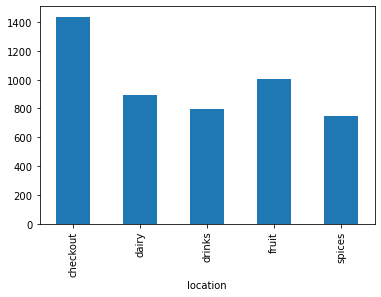

In [8]:
mon.groupby('location')['customer_no'].count().plot(kind='bar')

##Hourly distribution of the customers

In [9]:
mon.groupby('hours')['customer_no'].count()

hours
7     317
8     364
9     308
10    282
11    189
12    265
13    412
14    305
15    342
16    307
17    410
18    449
19    404
20    377
21    153
Name: customer_no, dtype: int64

<AxesSubplot:xlabel='hours', ylabel='Density'>

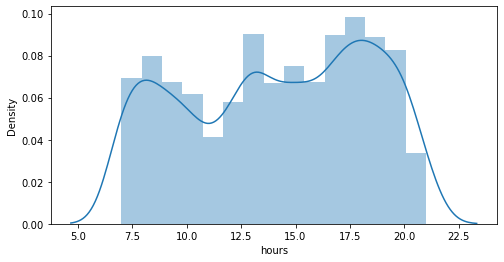

In [10]:
#mon.groupby('hours')['customer_no'].count().plot(kind='bar')
plt.figure(figsize=(8,4)) #to see the variation in the data distribution
sns.distplot(mon["hours"])

##Calculate the total number of customers in each section over time

In [11]:
#mon.groupby(['location','hours'])['customer_no'].count()

In [12]:
lt=mon.groupby(['location','hours'])['customer_no','customer_id'].count()
lt

customer_no  customer_id
location hours                          
checkout 7               92           92
         8              112          112
         9               85           85
         10              90           90
         11              55           55
...                     ...          ...
spices   17              50           50
         18              70           70
         19              59           59
         20              52           52
         21              18           18

[75 rows x 2 columns]

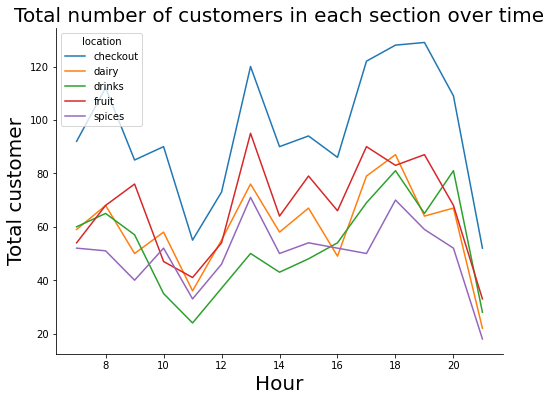

In [13]:
fig, ax=plt.subplots(figsize=(8, 6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Hour', fontsize=20)
plt.ylabel('Total customer', fontsize=20)


plt.title('Total number of customers in each section over time',fontsize=20)

sns.lineplot(x='hours',y='customer_no',hue='location',data=lt)
#plt.axis('off')
plt.show()

Display the number of customers at checkout over time

In [14]:
mon.groupby(['location','time'])['customer_no'].count().loc['checkout']

time
07:05:00    2
07:06:00    2
07:07:00    1
07:08:00    3
07:09:00    1
           ..
21:44:00    1
21:46:00    1
21:47:00    2
21:48:00    2
21:49:00    2
Name: customer_no, Length: 700, dtype: int64

Calculate the time each customer spent in the market

In [15]:
entry_datetime=mon[['timestamp','customer_no']].groupby('customer_no').min()
entry_datetime

,timestamp
customer_no,
1,2019-09-02 07:03:00
2,2019-09-02 07:03:00
3,2019-09-02 07:04:00
4,2019-09-02 07:04:00
5,2019-09-02 07:04:00
...,...
1443,2019-09-02 21:47:00
1444,2019-09-02 21:48:00
1445,2019-09-02 21:49:00


In [16]:
entry_datetime.rename(columns={'timestamp':'entry_time'},inplace=True)
entry_datetime.sort_values('entry_time')

,entry_time
customer_no,
1,2019-09-02 07:03:00
2,2019-09-02 07:03:00
3,2019-09-02 07:04:00
4,2019-09-02 07:04:00
5,2019-09-02 07:04:00
...,...
1443,2019-09-02 21:47:00
1444,2019-09-02 21:48:00
1445,2019-09-02 21:49:00


In [17]:
exit_datetime=mon[['timestamp','customer_no']].groupby('customer_no').max()
exit_datetime

,timestamp
customer_no,
1,2019-09-02 07:05:00
2,2019-09-02 07:06:00
3,2019-09-02 07:06:00
4,2019-09-02 07:08:00
5,2019-09-02 07:05:00
...,...
1443,2019-09-02 21:48:00
1444,2019-09-02 21:49:00
1445,2019-09-02 21:49:00


In [18]:
exit_datetime.rename(columns={'timestamp':'exit_time'},inplace=True)
exit_datetime.sort_values('exit_time')

,exit_time
customer_no,
1,2019-09-02 07:05:00
5,2019-09-02 07:05:00
2,2019-09-02 07:06:00
3,2019-09-02 07:06:00
8,2019-09-02 07:07:00
...,...
1442,2019-09-02 21:49:00
1444,2019-09-02 21:49:00
1445,2019-09-02 21:49:00


In [19]:
customer_timespent=pd.concat([entry_datetime,exit_datetime],axis=1)

In [20]:
customer_timespent

,entry_time,exit_time
customer_no,,
1,2019-09-02 07:03:00,2019-09-02 07:05:00
2,2019-09-02 07:03:00,2019-09-02 07:06:00
3,2019-09-02 07:04:00,2019-09-02 07:06:00
4,2019-09-02 07:04:00,2019-09-02 07:08:00
5,2019-09-02 07:04:00,2019-09-02 07:05:00
...,...,...
1443,2019-09-02 21:47:00,2019-09-02 21:48:00
1444,2019-09-02 21:48:00,2019-09-02 21:49:00
1445,2019-09-02 21:49:00,2019-09-02 21:49:00


In [21]:
default_exit_time = pd.to_datetime("21:51:00").time()
default_exit_time

datetime.time(21, 51)

In [22]:
customer_timespent['exit_time'].fillna(default_exit_time,inplace=True)
customer_timespent

,entry_time,exit_time
customer_no,,
1,2019-09-02 07:03:00,2019-09-02 07:05:00
2,2019-09-02 07:03:00,2019-09-02 07:06:00
3,2019-09-02 07:04:00,2019-09-02 07:06:00
4,2019-09-02 07:04:00,2019-09-02 07:08:00
5,2019-09-02 07:04:00,2019-09-02 07:05:00
...,...,...
1443,2019-09-02 21:47:00,2019-09-02 21:48:00
1444,2019-09-02 21:48:00,2019-09-02 21:49:00
1445,2019-09-02 21:49:00,2019-09-02 21:49:00


In [23]:
customer_timespent['time_spent']=customer_timespent['exit_time']-customer_timespent['entry_time']

In [24]:
customer_timespent

,entry_time,exit_time,time_spent
customer_no,,,
1,2019-09-02 07:03:00,2019-09-02 07:05:00,0 days 00:02:00
2,2019-09-02 07:03:00,2019-09-02 07:06:00,0 days 00:03:00
3,2019-09-02 07:04:00,2019-09-02 07:06:00,0 days 00:02:00
4,2019-09-02 07:04:00,2019-09-02 07:08:00,0 days 00:04:00
5,2019-09-02 07:04:00,2019-09-02 07:05:00,0 days 00:01:00
...,...,...,...
1443,2019-09-02 21:47:00,2019-09-02 21:48:00,0 days 00:01:00
1444,2019-09-02 21:48:00,2019-09-02 21:49:00,0 days 00:01:00
1445,2019-09-02 21:49:00,2019-09-02 21:49:00,0 days 00:00:00


In [25]:
monday=pd.merge(mon,customer_timespent,on=['customer_no'])
monday

,timestamp,customer_no,location,day,hours,time,customer_id,entry_time,exit_time,time_spent
0,2019-09-02 07:03:00,1,dairy,Monday,7,07:03:00,Monday-1,2019-09-02 07:03:00,2019-09-02 07:05:00,0 days 00:02:00
1,2019-09-02 07:05:00,1,checkout,Monday,7,07:05:00,Monday-1,2019-09-02 07:03:00,2019-09-02 07:05:00,0 days 00:02:00
2,2019-09-02 07:03:00,2,dairy,Monday,7,07:03:00,Monday-2,2019-09-02 07:03:00,2019-09-02 07:06:00,0 days 00:03:00
3,2019-09-02 07:06:00,2,checkout,Monday,7,07:06:00,Monday-2,2019-09-02 07:03:00,2019-09-02 07:06:00,0 days 00:03:00
4,2019-09-02 07:04:00,3,dairy,Monday,7,07:04:00,Monday-3,2019-09-02 07:04:00,2019-09-02 07:06:00,0 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...
4879,2019-09-02 21:48:00,1444,spices,Monday,21,21:48:00,Monday-1444,2019-09-02 21:48:00,2019-09-02 21:49:00,0 days 00:01:00
4880,2019-09-02 21:49:00,1444,checkout,Monday,21,21:49:00,Monday-1444,2019-09-02 21:48:00,2019-09-02 21:49:00,0 days 00:01:00
4881,2019-09-02 21:49:00,1445,dairy,Monday,21,21:49:00,Monday-1445,2019-09-02 21:49:00,2019-09-02 21:49:00,0 days 00:00:00
4882,2019-09-02 21:50:00,1446,dairy,Monday,21,21:50:00,Monday-1446,2019-09-02 21:50:00,2019-09-02 21:50:00,0 days 00:00:00


In [26]:
monday[monday['time_spent']=='00:00:00']

,timestamp,customer_no,location,day,hours,time,customer_id,entry_time,exit_time,time_spent
4869,2019-09-02 21:46:00,1439,fruit,Monday,21,21:46:00,Monday-1439,2019-09-02 21:46:00,2019-09-02 21:46:00,0 days
4881,2019-09-02 21:49:00,1445,dairy,Monday,21,21:49:00,Monday-1445,2019-09-02 21:49:00,2019-09-02 21:49:00,0 days
4882,2019-09-02 21:50:00,1446,dairy,Monday,21,21:50:00,Monday-1446,2019-09-02 21:50:00,2019-09-02 21:50:00,0 days
4883,2019-09-02 21:50:00,1447,fruit,Monday,21,21:50:00,Monday-1447,2019-09-02 21:50:00,2019-09-02 21:50:00,0 days


In [27]:
monday.drop(labels=[4869,4881,4882,4883],axis=0,inplace=True)


In [28]:
monday[monday['time_spent']=='00:00:00']

,timestamp,customer_no,location,day,hours,time,customer_id,entry_time,exit_time,time_spent


In [29]:
monday

,timestamp,customer_no,location,day,hours,time,customer_id,entry_time,exit_time,time_spent
0,2019-09-02 07:03:00,1,dairy,Monday,7,07:03:00,Monday-1,2019-09-02 07:03:00,2019-09-02 07:05:00,0 days 00:02:00
1,2019-09-02 07:05:00,1,checkout,Monday,7,07:05:00,Monday-1,2019-09-02 07:03:00,2019-09-02 07:05:00,0 days 00:02:00
2,2019-09-02 07:03:00,2,dairy,Monday,7,07:03:00,Monday-2,2019-09-02 07:03:00,2019-09-02 07:06:00,0 days 00:03:00
3,2019-09-02 07:06:00,2,checkout,Monday,7,07:06:00,Monday-2,2019-09-02 07:03:00,2019-09-02 07:06:00,0 days 00:03:00
4,2019-09-02 07:04:00,3,dairy,Monday,7,07:04:00,Monday-3,2019-09-02 07:04:00,2019-09-02 07:06:00,0 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...
4876,2019-09-02 21:49:00,1442,checkout,Monday,21,21:49:00,Monday-1442,2019-09-02 21:47:00,2019-09-02 21:49:00,0 days 00:02:00
4877,2019-09-02 21:47:00,1443,fruit,Monday,21,21:47:00,Monday-1443,2019-09-02 21:47:00,2019-09-02 21:48:00,0 days 00:01:00
4878,2019-09-02 21:48:00,1443,dairy,Monday,21,21:48:00,Monday-1443,2019-09-02 21:47:00,2019-09-02 21:48:00,0 days 00:01:00
4879,2019-09-02 21:48:00,1444,spices,Monday,21,21:48:00,Monday-1444,2019-09-02 21:48:00,2019-09-02 21:49:00,0 days 00:01:00


Calculate the total number of customers in the supermarket over time.

In [30]:
monday.groupby(['time'])['customer_no'].count()

time
07:03:00    2
07:04:00    6
07:05:00    4
07:06:00    8
07:07:00    4
           ..
21:44:00    2
21:46:00    5
21:47:00    6
21:48:00    7
21:49:00    6
Name: customer_no, Length: 873, dtype: int64

In [31]:
monday

,timestamp,customer_no,location,day,hours,time,customer_id,entry_time,exit_time,time_spent
0,2019-09-02 07:03:00,1,dairy,Monday,7,07:03:00,Monday-1,2019-09-02 07:03:00,2019-09-02 07:05:00,0 days 00:02:00
1,2019-09-02 07:05:00,1,checkout,Monday,7,07:05:00,Monday-1,2019-09-02 07:03:00,2019-09-02 07:05:00,0 days 00:02:00
2,2019-09-02 07:03:00,2,dairy,Monday,7,07:03:00,Monday-2,2019-09-02 07:03:00,2019-09-02 07:06:00,0 days 00:03:00
3,2019-09-02 07:06:00,2,checkout,Monday,7,07:06:00,Monday-2,2019-09-02 07:03:00,2019-09-02 07:06:00,0 days 00:03:00
4,2019-09-02 07:04:00,3,dairy,Monday,7,07:04:00,Monday-3,2019-09-02 07:04:00,2019-09-02 07:06:00,0 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...
4876,2019-09-02 21:49:00,1442,checkout,Monday,21,21:49:00,Monday-1442,2019-09-02 21:47:00,2019-09-02 21:49:00,0 days 00:02:00
4877,2019-09-02 21:47:00,1443,fruit,Monday,21,21:47:00,Monday-1443,2019-09-02 21:47:00,2019-09-02 21:48:00,0 days 00:01:00
4878,2019-09-02 21:48:00,1443,dairy,Monday,21,21:48:00,Monday-1443,2019-09-02 21:47:00,2019-09-02 21:48:00,0 days 00:01:00
4879,2019-09-02 21:48:00,1444,spices,Monday,21,21:48:00,Monday-1444,2019-09-02 21:48:00,2019-09-02 21:49:00,0 days 00:01:00


In [32]:
ptm= monday.drop(columns=['day','hours','time','entry_time','exit_time','time_spent'])
ptm.head()

,timestamp,customer_no,location,customer_id
0,2019-09-02 07:03:00,1,dairy,Monday-1
1,2019-09-02 07:05:00,1,checkout,Monday-1
2,2019-09-02 07:03:00,2,dairy,Monday-2
3,2019-09-02 07:06:00,2,checkout,Monday-2
4,2019-09-02 07:04:00,3,dairy,Monday-3


In [33]:
ptm['after']=ptm.groupby(['customer_no'])['location'].shift(-1)
ptm

,timestamp,customer_no,location,customer_id,after
0,2019-09-02 07:03:00,1,dairy,Monday-1,checkout
1,2019-09-02 07:05:00,1,checkout,Monday-1,NaN
2,2019-09-02 07:03:00,2,dairy,Monday-2,checkout
3,2019-09-02 07:06:00,2,checkout,Monday-2,NaN
4,2019-09-02 07:04:00,3,dairy,Monday-3,checkout
...,...,...,...,...,...
4876,2019-09-02 21:49:00,1442,checkout,Monday-1442,NaN
4877,2019-09-02 21:47:00,1443,fruit,Monday-1443,dairy
4878,2019-09-02 21:48:00,1443,dairy,Monday-1443,NaN
4879,2019-09-02 21:48:00,1444,spices,Monday-1444,checkout


In [34]:
ptm['after'].fillna('checkout',inplace=True)

In [35]:
ct=pd.crosstab(ptm['location'],ptm['after'],normalize=0)
ct

after,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.349384,0.000000,0.244121,0.201568,0.204927
drinks,0.534504,0.028858,0.000000,0.233375,0.203262
fruit,0.524427,0.224327,0.129611,0.000000,0.121635
spices,0.238667,0.313333,0.289333,0.158667,0.000000


In [36]:
np.random.seed(124)
first = np.random.choice(["dairy", "spices", "drinks", "fruit"])
print(first)

drinks


In [37]:
#next_location = np.dot([0,0,1,0,0],ct)
#next_location

In [38]:
ct.loc[np.random.choice(["dairy", "spices", "drinks", "fruit"])].to_list()

[0.3493840985442329,
 0.0,
 0.24412094064949608,
 0.20156774916013437,
 0.20492721164613661]

In [39]:
def increment():
    "auto-increments by 1 starting from 1 (for customer_no)"
    i = 1
    while True:
        yield i
        i = i + 1


auto_increment = increment()

class Customer:
    
    def __init__(self):
        new_customer_nr = next(auto_increment)
        self.customer_nr = new_customer_nr 
        self.state = np.random.choice(
            ["dairy", "spices", "drinks", "fruit"])
        
     
    def __repr__(self):
        return f"""{self.customer_nr} is in section '{self.state}'."""

    
    def transition(self):
        """
        Defines how the customer transitions between states/location.
        """
        if self.state == "checkout":
            self.state = "has left the supermarket"
        else:
            self.state = np.random.choice(
                ["checkout", "dairy", "drinks", "fruit", "spices"],
                p=ct.loc[self.state].to_list(),
            )
        return self.state    
        
        #self.next_location = np.dot([0,0,1,0,0],ct)
        print(f"""{self.customer_nr} is in '{self.state}'.""")
                                                 
    

In [40]:
for _ in range(10):
    customer = Customer()
    print(customer)
    customer.transition()
    print(customer)
    customer.transition()
    print(customer)

1 is in section 'spices'.
1 is in section 'fruit'.
1 is in section 'dairy'.
2 is in section 'dairy'.
2 is in section 'drinks'.
2 is in section 'checkout'.
3 is in section 'spices'.
3 is in section 'fruit'.
3 is in section 'checkout'.
4 is in section 'drinks'.
4 is in section 'fruit'.
4 is in section 'dairy'.
5 is in section 'spices'.
5 is in section 'drinks'.
5 is in section 'fruit'.
6 is in section 'drinks'.
6 is in section 'checkout'.
6 is in section 'has left the supermarket'.
7 is in section 'spices'.
7 is in section 'fruit'.
7 is in section 'checkout'.
8 is in section 'drinks'.
8 is in section 'fruit'.
8 is in section 'spices'.
9 is in section 'spices'.
9 is in section 'checkout'.
9 is in section 'has left the supermarket'.
10 is in section 'fruit'.
10 is in section 'dairy'.
10 is in section 'drinks'.
